In [1]:
% matplotlib inline

import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow

#importeer Tensorflow namespaces
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
K.set_image_dim_ordering('tf')

Using TensorFlow backend.


In [2]:
#Inlezen van de dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.shape

(30000, 785)

In [3]:
# CNN parameters
print(K.image_data_format())
batch_size = 128
num_classes = 10
epochs = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)

channels_last


In [4]:
#Opsplitsen in features en targets

train_labels = df_train.label.values
test_labels = df_test.label.values

y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

X_train = df_train.drop("label",axis=1).values
X_train = X_train.reshape((len(X_train),28, 28,1))

X_test  = df_test.drop("label",axis=1).values
X_test = X_test.reshape((len(X_test),28, 28,1)) # (aantal afbeeldingen, aantal rijen, aantal kolommen, aantal kleurenkanalen)




In [5]:
# Normalisatie van 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# model opbouwen

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) # input convolutional layer 32 verschillende node,
                                            #kernel -> formaat dat structuur zoeken
                                            # Ingang = input_shape (grootte van input)
model.add(MaxPooling2D(pool_size=(2, 2)))  # Reduceren van factor 4 (2 bij 2)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Zet 25% random uit elke epoch (afwisselend)
model.add(Flatten()) # Omzetten naar traditioneel network
model.add(Dense(100, activation='relu')) # hidden layer van 100 neurons
model.add(Dropout(0.5)) # verhogen bij overfitting
model.add(Dense(num_classes, activation='softmax')) # output layer

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adagrad(),
              metrics=['accuracy'])


In [7]:
# Train het CNN

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/10
30000/30000 [==============================] - 7s - loss: 0.3218 - acc: 0.9006     
Epoch 2/10
30000/30000 [==============================] - 3s - loss: 0.1378 - acc: 0.9596     
Epoch 3/10
30000/30000 [==============================] - 2s - loss: 0.1083 - acc: 0.9682     
Epoch 4/10
30000/30000 [==============================] - 2s - loss: 0.0944 - acc: 0.9730     
Epoch 5/10
30000/30000 [==============================] - 2s - loss: 0.0855 - acc: 0.9750     
Epoch 6/10
30000/30000 [==============================] - 2s - loss: 0.0769 - acc: 0.9778     
Epoch 7/10
30000/30000 [==============================] - 2s - loss: 0.0741 - acc: 0.9777     
Epoch 8/10
30000/30000 [==============================] - 3s - loss: 0.0669 - acc: 0.9798     
Epoch 9/10
30000/30000 [==============================] - 2s - loss: 0.0642 - acc: 0.9807     
Epoch 10/10
30000/30000 [==============================] - 2s - loss: 0.0626 - acc: 0.9818     


In [8]:
scoreTrain = model.evaluate(X_train, y_train, verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print("trainScore", scoreTrain)
print("testScore", score)

trainScore [0.025069482701985786, 0.99276666666666669]
testScore [0.036462892987222099, 0.98883333333333334]


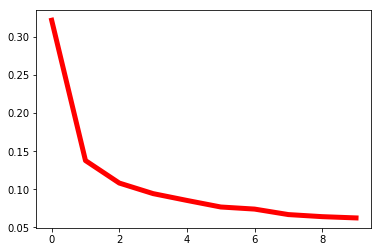

In [9]:
plt.plot(history.history['loss'],'red',linewidth=5.0)

[0.054922182476730086, 0.98266666666666669]


In [13]:
model.save('model.h5')  # creates a HDF5 file 'model.h5'